In [125]:
import os
import glob
import pickle 

import numpy as np

%matplotlib inline 

import matplotlib.pyplot as plt

from scipy.stats import kde
import seaborn as sns

from motormetrics.ee import get_ramps_from_raw_reference

In [126]:
def get_data_metrics(bench):
    fin = open('../../../datasets/Data_11052020_exponential_dist_ramps/benchmarks/' + bench + '.pkl', 'rb')
    input_data = pickle.load(fin)
    fin.close()


    fin = open('../../../results/Data_11052020/' + bench + '/shallow_fnn_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.1_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    shallow_fnn_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/deep_fnn_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.1_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    deep_fnn_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/shallow_rnn_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.1_batchSize_2048_epochs_1000_loss_mse_hiddenSize_32.pkl', 'rb')
    shallow_rnn_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/deep_rnn_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.1_batchSize_2048_epochs_1000_loss_mse_hiddenSize_32.pkl', 'rb')
    deep_rnn_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/shallow_cnn_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.1_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    shallow_cnn_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/deep_cnn_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.1_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    deep_cnn_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/encdec_skip_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.01_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    encdec_skip_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/encdec_rnn_skip_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.01_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    encdec_rnn_skip_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/encdec_birnn_skip_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.01_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    encdec_birnn_skip_model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../results/Data_11052020/' + bench + '/encdec_diag_birnn_skip_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.01_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    encdec_diag_birnn_skip_model_data = pickle.load(fin)
    fin.close()
    
    return input_data, shallow_fnn_model_data, deep_fnn_model_data, \
            shallow_rnn_model_data, deep_rnn_model_data, \
        shallow_cnn_model_data, deep_cnn_model_data, \
        encdec_skip_model_data, encdec_rnn_skip_model_data, encdec_birnn_skip_model_data, encdec_diag_birnn_skip_model_data

In [127]:
bench = 'bench1'
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics(bench)

ref_speed, ref_torque = data['reference_speed_interp'], data['reference_torque_interp']
sim_speed, sim_torque = data['speed'], data['torque']
time = data['time']

sfnn_speed = sfnn['pred_speed']
sfnn_torque = sfnn['pred_torque']

dfnn_speed = dfnn['pred_speed']
dfnn_torque = dfnn['pred_torque']

srnn_speed = srnn['pred_speed']
srnn_torque = srnn['pred_torque']

drnn_speed = drnn['pred_speed']
drnn_torque = drnn['pred_torque']

scnn_speed = scnn['pred_speed']
scnn_torque = scnn['pred_torque']

dcnn_speed = dcnn['pred_speed']
dcnn_torque = dcnn['pred_torque']

skip_speed = skip['pred_speed']
skip_torque = skip['pred_torque']

rnn_skip_speed = rnn_skip['pred_speed']
rnn_skip_torque = rnn_skip['pred_torque']

birnn_skip_speed = birnn_skip['pred_speed']
birnn_skip_torque = birnn_skip['pred_torque']

diag_birnn_skip_speed = diag_birnn_skip['pred_speed']
diag_birnn_skip_torque = diag_birnn_skip['pred_torque']

st = 0
et = int(4.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig('bench1.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(0.8 / 0.004)
et = int(1.1 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig('bench1_1st.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(1.2 / 0.004)
et = int(1.7 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig('bench1_2nd.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(1.8 / 0.004)
et = int(2.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig('bench1_3rd.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(0.8 / 0.004)
et = int(2.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_torque[st:et], 'k:', label="Load (Abs. Value)")
plt.plot(time[st:et], sim_torque[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_torque[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_torque[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_torque[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend(loc='best', bbox_to_anchor=(0.25, 0., 0.5, 0.6))
plt.xlabel('Time (s)')
plt.ylabel('Torque (% Nominal Torque)')
# plt.plot()
# plt.show()
plt.savefig('bench1_torque.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

In [128]:
bench = 'bench2'
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics(bench)

ref_speed, ref_torque = data['reference_speed_interp'], data['reference_torque_interp']
sim_speed, sim_torque = data['speed'], data['torque']
time = data['time']

sfnn_speed = sfnn['pred_speed']
sfnn_torque = sfnn['pred_torque']

dfnn_speed = dfnn['pred_speed']
dfnn_torque = dfnn['pred_torque']

srnn_speed = srnn['pred_speed']
srnn_torque = srnn['pred_torque']

drnn_speed = drnn['pred_speed']
drnn_torque = drnn['pred_torque']

scnn_speed = scnn['pred_speed']
scnn_torque = scnn['pred_torque']

dcnn_speed = dcnn['pred_speed']
dcnn_torque = dcnn['pred_torque']

skip_speed = skip['pred_speed']
skip_torque = skip['pred_torque']

rnn_skip_speed = rnn_skip['pred_speed']
rnn_skip_torque = rnn_skip['pred_torque']

birnn_skip_speed = birnn_skip['pred_speed']
birnn_skip_torque = birnn_skip['pred_torque']

diag_birnn_skip_speed = diag_birnn_skip['pred_speed']
diag_birnn_skip_torque = diag_birnn_skip['pred_torque']

st = int(5 / 0.004)
et = int(8 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(5.8 / 0.004)
et = int(6.1 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_1st.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(6.2 / 0.004)
et = int(6.7 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_2nd.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(6.8 / 0.004)
et = int(7.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_3rd.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(5.8 / 0.004)
et = int(7.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_torque[st:et], 'k:', label="Load (Abs. Value)")
plt.plot(time[st:et], sim_torque[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_torque[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_torque[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_torque[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend(loc='best', bbox_to_anchor=(0.25, 0., 0.5, 0.6))
plt.xlabel('Time (s)')
plt.ylabel('Torque (% Nominal Torque)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_torque.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

In [129]:
bench = 'bench3'
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics(bench)

ref_speed, ref_torque = data['reference_speed_interp'], data['reference_torque_interp']
sim_speed, sim_torque = data['speed'], data['torque']
time = data['time']

sfnn_speed = sfnn['pred_speed']
sfnn_torque = sfnn['pred_torque']

dfnn_speed = dfnn['pred_speed']
dfnn_torque = dfnn['pred_torque']

srnn_speed = srnn['pred_speed']
srnn_torque = srnn['pred_torque']

drnn_speed = drnn['pred_speed']
drnn_torque = drnn['pred_torque']

scnn_speed = scnn['pred_speed']
scnn_torque = scnn['pred_torque']

dcnn_speed = dcnn['pred_speed']
dcnn_torque = dcnn['pred_torque']

skip_speed = skip['pred_speed']
skip_torque = skip['pred_torque']

rnn_skip_speed = rnn_skip['pred_speed']
rnn_skip_torque = rnn_skip['pred_torque']

birnn_skip_speed = birnn_skip['pred_speed']
birnn_skip_torque = birnn_skip['pred_torque']

diag_birnn_skip_speed = diag_birnn_skip['pred_speed']
diag_birnn_skip_torque = diag_birnn_skip['pred_torque']

st = int(5 / 0.004)
et = int(8 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(5.8 / 0.004)
et = int(6.1 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_1st.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(6.2 / 0.004)
et = int(6.7 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_2nd.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(6.8 / 0.004)
et = int(7.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_3rd.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(5.8 / 0.004)
et = int(7.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_torque[st:et], 'k:', label="Load (Abs. Value)")
plt.plot(time[st:et], sim_torque[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_torque[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_torque[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_torque[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Torque (% Nominal Torque)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_torque.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

In [130]:
bench = 'bench4'
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics(bench)

ref_speed, ref_torque = data['reference_speed_interp'], data['reference_torque_interp']
sim_speed, sim_torque = data['speed'], data['torque']
time = data['time']

sfnn_speed = sfnn['pred_speed']
sfnn_torque = sfnn['pred_torque']

dfnn_speed = dfnn['pred_speed']
dfnn_torque = dfnn['pred_torque']

srnn_speed = srnn['pred_speed']
srnn_torque = srnn['pred_torque']

drnn_speed = drnn['pred_speed']
drnn_torque = drnn['pred_torque']

scnn_speed = scnn['pred_speed']
scnn_torque = scnn['pred_torque']

dcnn_speed = dcnn['pred_speed']
dcnn_torque = dcnn['pred_torque']

skip_speed = skip['pred_speed']
skip_torque = skip['pred_torque']

rnn_skip_speed = rnn_skip['pred_speed']
rnn_skip_torque = rnn_skip['pred_torque']

birnn_skip_speed = birnn_skip['pred_speed']
birnn_skip_torque = birnn_skip['pred_torque']

diag_birnn_skip_speed = diag_birnn_skip['pred_speed']
diag_birnn_skip_torque = diag_birnn_skip['pred_torque']

st = int(2.5 / 0.004)
et = int(4 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_torque[st:et], 'k:', label="Load (Abs. Value)")
plt.plot(time[st:et], sim_torque[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_torque[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_torque[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_torque[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Torque (% Nominal Torque)')
# plt.plot()
# plt.show()
plt.savefig(bench + '.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(2.8 / 0.004)
et = int(3.008 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_torque[st:et], 'k:', label="Load (Abs. Value)")
plt.plot(time[st:et], sim_torque[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_torque[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_torque[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_torque[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Torque (% Nominal Torque)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_1st.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(3.2 / 0.004)
et = int(3.7 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_torque[st:et], 'k:', label="Load (Abs. Value)")
plt.plot(time[st:et], sim_torque[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_torque[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_torque[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_torque[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Torque (% Nominal Torque)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_2nd.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(3.004 / 0.004)
et = int(3.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_torque[st:et], 'k:', label="Load (Abs. Value)")
plt.plot(time[st:et], sim_torque[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_torque[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_torque[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_torque[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Torque (% Nominal Torque)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_3rd.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(2.8 / 0.004)
et = int(4.5 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
# plt.plot(time, sfnn_speed, label="sfnn")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
# plt.plot(time, srnn_speed, label="RNN")
# plt.plot(time[st:et], drnn_speed[st:et], label="RNN", alpha=0.7)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
# plt.plot(time[st:et],  dcnn_speed[st:et], '--', label="Vanilla", alpha=0.6)
# plt.plot(time[st:et], skip_speed[st:et],'--',  label="Skip", alpha=0.5)
# plt.plot(time[st:et],  rnn_skip_speed[st:et],'--',  label="RNN", alpha=0.5)
# plt.plot(time[st:et],  birnn_skip_speed[st:et], '--', label="BiRNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '_speed.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

In [131]:
bench = 'bench5'
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics(bench)

ref_speed, ref_torque = data['reference_speed_interp'], data['reference_torque_interp']
sim_speed, sim_torque = data['speed'], data['torque']
time = data['time']

sfnn_speed = sfnn['pred_speed']
sfnn_torque = sfnn['pred_torque']

dfnn_speed = dfnn['pred_speed']
dfnn_torque = dfnn['pred_torque']

srnn_speed = srnn['pred_speed']
srnn_torque = srnn['pred_torque']

drnn_speed = drnn['pred_speed']
drnn_torque = drnn['pred_torque']

scnn_speed = scnn['pred_speed']
scnn_torque = scnn['pred_torque']

dcnn_speed = dcnn['pred_speed']
dcnn_torque = dcnn['pred_torque']

skip_speed = skip['pred_speed']
skip_torque = skip['pred_torque']

rnn_skip_speed = rnn_skip['pred_speed']
rnn_skip_torque = rnn_skip['pred_torque']

birnn_skip_speed = birnn_skip['pred_speed']
birnn_skip_torque = birnn_skip['pred_torque']

diag_birnn_skip_speed = diag_birnn_skip['pred_speed']
diag_birnn_skip_torque = diag_birnn_skip['pred_torque']

st = int(1.5 / 0.004)
et = int(60 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(5 / 0.004)
et = int(55 / 0.004)
sns.set_style("darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time[st:et],  sim_speed[st:et] - dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
ax.plot(time[st:et], sim_speed[st:et] - scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
ax.plot(time[st:et], sim_speed[st:et] - diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)
ax.xaxis.set_ticks(np.arange(5, 65, 10))

ax.set(xlabel = 'Time (s)')
ax.set(ylabel = 'Speed (Hz)')
ax.text(.5,.9,'Difference with real speed',
        fontsize=14, horizontalalignment='center',
       transform=ax.transAxes)
ax.legend(loc='best', bbox_to_anchor=(0.5, 0, 0.5, 0.9))

# plt.plot()
# plt.show()
plt.savefig(bench + '_dif.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()



In [132]:
bench = 'bench6'
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics(bench)

ref_speed, ref_torque = data['reference_speed_interp'], data['reference_torque_interp']
sim_speed, sim_torque = data['speed'], data['torque']
time = data['time']

sfnn_speed = sfnn['pred_speed']
sfnn_torque = sfnn['pred_torque']

dfnn_speed = dfnn['pred_speed']
dfnn_torque = dfnn['pred_torque']

srnn_speed = srnn['pred_speed']
srnn_torque = srnn['pred_torque']

drnn_speed = drnn['pred_speed']
drnn_torque = drnn['pred_torque']

scnn_speed = scnn['pred_speed']
scnn_torque = scnn['pred_torque']

dcnn_speed = dcnn['pred_speed']
dcnn_torque = dcnn['pred_torque']

skip_speed = skip['pred_speed']
skip_torque = skip['pred_torque']

rnn_skip_speed = rnn_skip['pred_speed']
rnn_skip_torque = rnn_skip['pred_torque']

birnn_skip_speed = birnn_skip['pred_speed']
birnn_skip_torque = birnn_skip['pred_torque']

diag_birnn_skip_speed = diag_birnn_skip['pred_speed']
diag_birnn_skip_torque = diag_birnn_skip['pred_torque']

st = int(2 / 0.004)
et = int(60 / 0.004)
sns.set_style("darkgrid")
plt.plot(time[st:et], ref_speed[st:et], 'k:', label="Reference")
plt.plot(time[st:et], sim_speed[st:et], 'b--', label="Real")
plt.plot(time[st:et], dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
plt.plot(time[st:et], scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
plt.plot(time[st:et], diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
# plt.plot()
# plt.show()
plt.savefig(bench + '.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

st = int(7 / 0.004)
et = int(57 / 0.004)
sns.set_style("darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time[st:et],  sim_speed[st:et] - dfnn_speed[st:et], 'y', label="FCN", alpha=0.8)
ax.plot(time[st:et], sim_speed[st:et] - scnn_speed[st:et], 'g', label="CNN", alpha=0.5)
ax.plot(time[st:et], sim_speed[st:et] - diag_birnn_skip_speed[st:et], 'r', label="DiagBiRNN", alpha=0.5)
ax.xaxis.set_ticks(np.arange(7, 67, 10))

ax.set(xlabel = 'Time (s)')
ax.set(ylabel = 'Speed (Hz)')
ax.text(.5,.9,'Difference with real speed',
        fontsize=14, horizontalalignment='center',
       transform=ax.transAxes)
ax.legend(loc='best', bbox_to_anchor=(0.5, 0, 0.5, 0.9))
# plt.plot()
# plt.show()

plt.savefig(bench + '_dif.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()



In [188]:
pkls = glob.glob('../../../datasets/Data_09042020/train/*.pkl')

In [189]:
min_time = 1000
pkl_ids = []
tot_speed_ramps = 0
tot_torque_ramps = 0
for i in range(len(pkls)):
    fin = open(pkls[i], 'rb')
    data = pickle.load(fin)
    fin.close()
    pkl_ids.append([data['torque_time'][-1], i])
    tot_speed_ramps += len(get_ramps_from_raw_reference(data['reference_speed'], data['speed_time']))
    tot_torque_ramps += len(get_ramps_from_raw_reference(data['reference_torque'], data['torque_time']))

In [190]:
from operator import itemgetter
sorted_ids = sorted(pkl_ids, key=itemgetter(0))
len(pkls)

50

In [191]:
tot_speed_ramps, tot_torque_ramps

(462, 408)

In [195]:



fin = open(pkls[25], 'rb')
data4 = pickle.load(fin)
fin.close()

sns.set_style("darkgrid")
fig, ax = plt.subplots(2)

loc = np.argmax(data['torque'] < -200)
# plt.plot(data['time'], data['torque'], label='sim')
# plt.plot(data1['torque_time'], data1['reference_torque'], label='ref')
# plt.plot(data2['torque_time'], data2['reference_torque'], label='ref')
ax[0].plot(data4['torque_time'], data4['reference_torque'], 'k', label='ref')
ax[0].set(xlabel = 'Time (s)')
ax[0].set(ylabel = r'Load Torque ' + '\n' + '(% Nominal Torque)')
ax[0].yaxis.set_ticks([-130,  -75, 0, 75, 130])

# plt.plot(data['time'], data['speed'], label='sim')
ax[1].plot(data4['speed_time'], data4['reference_speed'], 'k', label='ref')
ax[1].set(xlabel = 'Time (s)')
ax[1].set(ylabel = 'Reference Speed (Hz)')
ax[1].yaxis.set_ticks([-80,  -40, 0, 40, 80])

plt.tight_layout()
# plt.show()
plt.savefig('train.pdf', dpi=500, bbox_inches='tight', pad_inches=0)
plt.close()

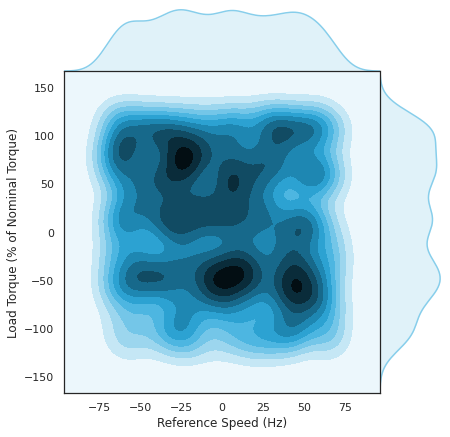

In [83]:
pkls = glob.glob('../../../datasets/Data_11052020_exponential_dist_ramps/train/*.pkl')

torques = []
speeds = []
current_d = []
current_q = []
voltage_d = []
voltage_q = []

tot_time = 0

for pkl in pkls:
    fin = open(pkl, 'rb')
    data = pickle.load(fin)
    fin.close()
    
    torque = data['reference_torque']
    speed = data['reference_speed']
    torque_time = data['torque_time']
    speed_time = data['speed_time']
    
    time = torque_time + speed_time
    time.sort()
    
    speed_interp = np.interp(time, speed_time, speed)
    torque_interp = np.interp(time, torque_time, torque)
    
    speeds += list(speed_interp)
    torques += list(torque_interp)
    
    tot_time += time[-1]
    
sns.set(style="white", color_codes=True)
sns_plot = sns.jointplot(x=speeds, y=torques, kind='kde', color="skyblue", space=0).set_axis_labels("Reference Speed (Hz)", "Load Torque (% of Nominal Torque)")
sns_plot.savefig("training_zone.pdf", dpi=500, format="pdf", transparent=True, bbox_inches="tight", pad_inches=0)

In [84]:
tot_time / 60

142.08906156629757

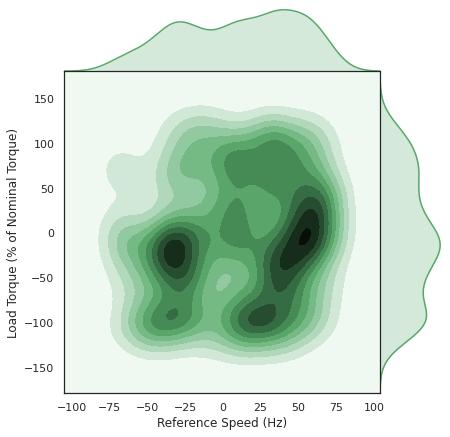

In [85]:
pkls = glob.glob('../../../datasets/Data_11052020_exponential_dist_ramps/val/*.pkl')

torques = []
speeds = []
current_d = []
current_q = []
voltage_d = []
voltage_q = []

tot_time = 0

for pkl in pkls:
    fin = open(pkl, 'rb')
    data = pickle.load(fin)
    fin.close()
    
    torque = data['reference_torque']
    speed = data['reference_speed']
    torque_time = data['torque_time']
    speed_time = data['speed_time']
    
    time = torque_time + speed_time
    time.sort()
    
    speed_interp = np.interp(time, speed_time, speed)
    torque_interp = np.interp(time, torque_time, torque)
    
    speeds += list(speed_interp)
    torques += list(torque_interp)
    
    tot_time += time[-1]
    
sns.set(style="white", color_codes=True)
sns_plot = sns.jointplot(x=speeds, y=torques, kind='kde', color="g", space=0).set_axis_labels("Reference Speed (Hz)", "Load Torque (% of Nominal Torque)")
sns_plot.savefig("validation_zone.pdf", dpi=500, format="pdf", transparent=True, bbox_inches="tight", pad_inches=0)

In [167]:
tot_time / 60

30.32659109041562

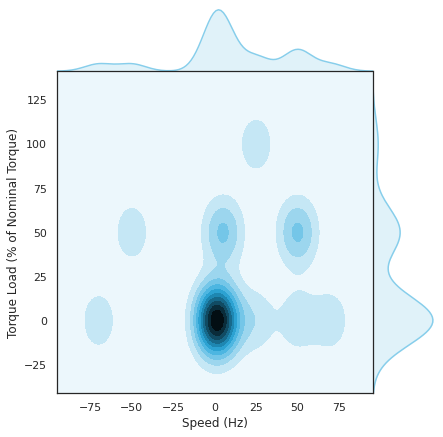

In [158]:
pkls = glob.glob('../../../datasets/Data_11052020_exponential_dist_ramps/benchmarks/*.pkl')

torques = []
speeds = []
current_d = []
current_q = []
voltage_d = []
voltage_q = []

for pkl in pkls:
    fin = open(pkl, 'rb')
    data = pickle.load(fin)
    fin.close()
    
    torque = data['reference_torque']
    speed = data['reference_speed']
    torque_time = data['torque_time']
    speed_time = data['speed_time']
    
    time = torque_time + speed_time
    time.sort()
    
    speed_interp = np.interp(time, speed_time, speed)
    torque_interp = np.interp(time, torque_time, torque)
    
    speeds += list(speed_interp)
    torques += list(torque_interp)
    
sns.set(style="white", color_codes=True)
sns_plot = sns.jointplot(x=speeds, y=torques, kind='kde', color="skyblue", space=0).set_axis_labels("Speed (Hz)", "Torque Load (% of Nominal Torque)")
sns_plot.savefig("benchmarking_zone.pdf", dpi=500, format="pdf", transparent=True, bbox_inches="tight", pad_inches=0)

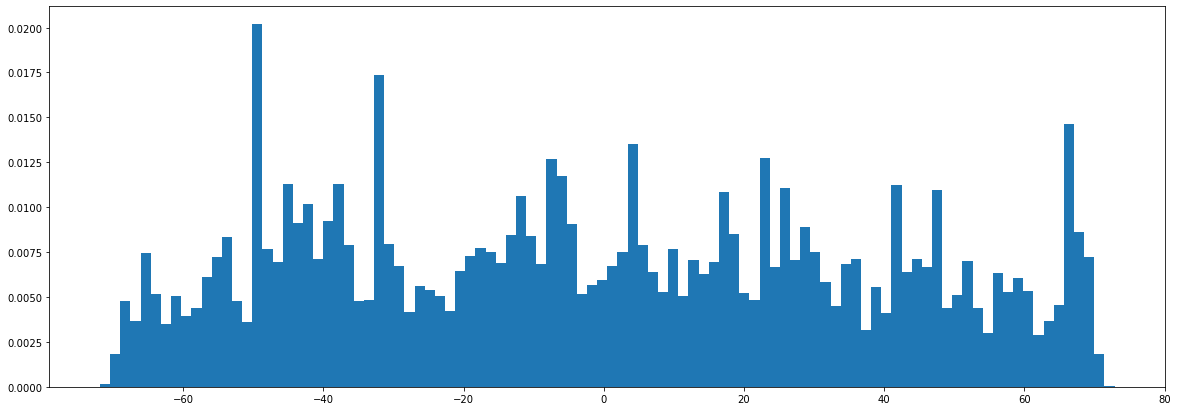

In [114]:
hist_speed = plt.hist(speeds, density=True, bins=100)

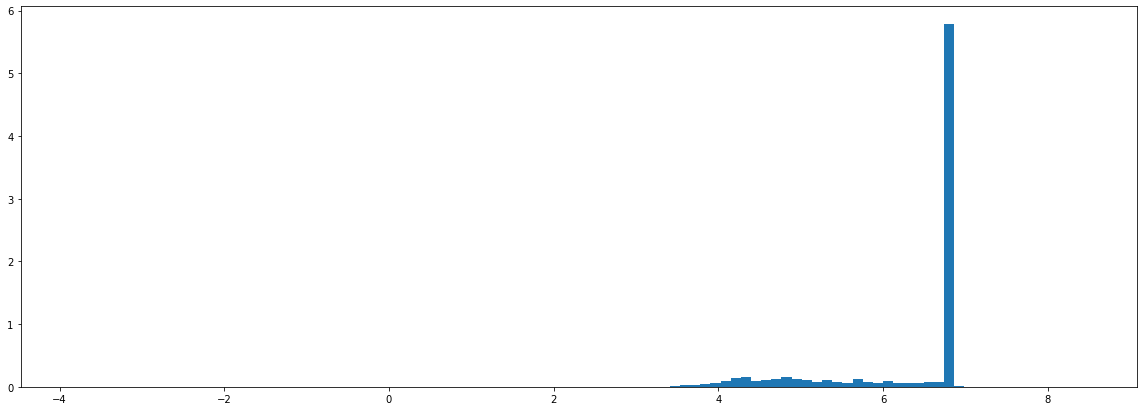

In [115]:
hist_current_d = plt.hist(current_d, density=True, bins=100)

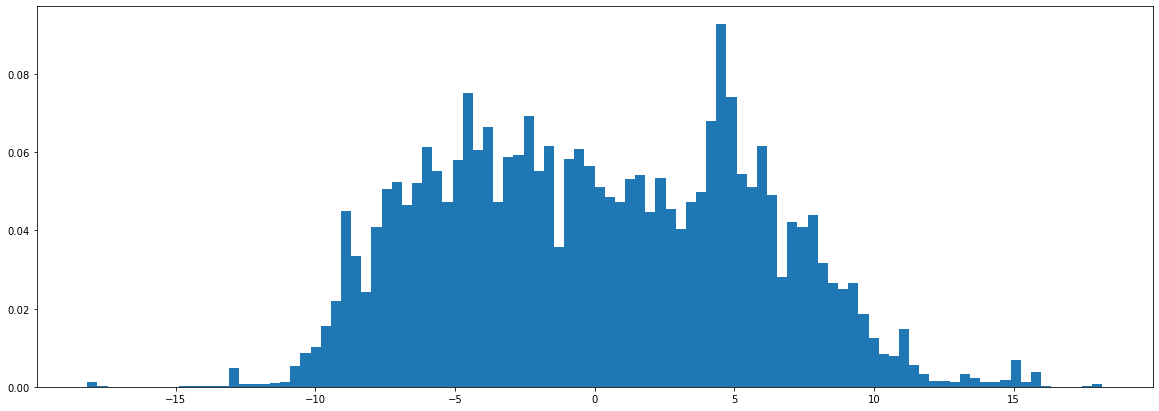

In [116]:
hist_current_q = plt.hist(current_q, density=True, bins=100)

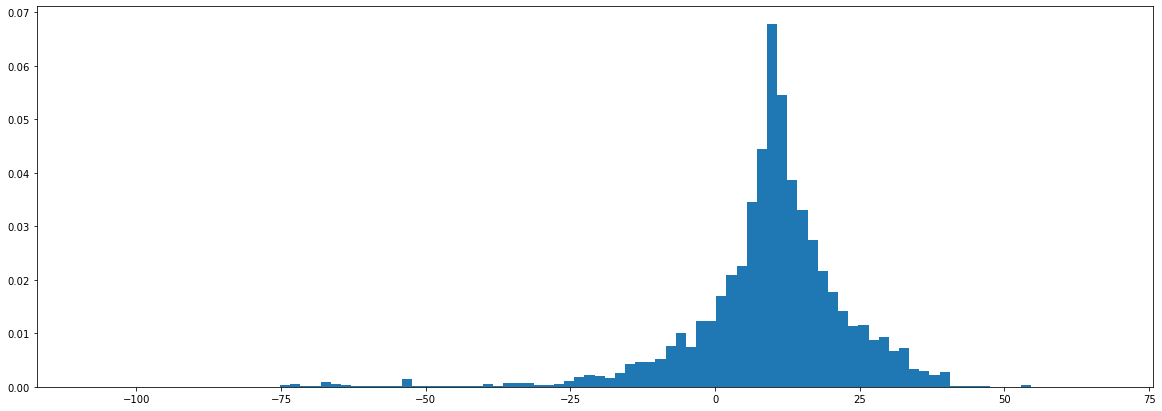

In [118]:
hist_voltage_d = plt.hist(voltage_d, density=True, bins=100)

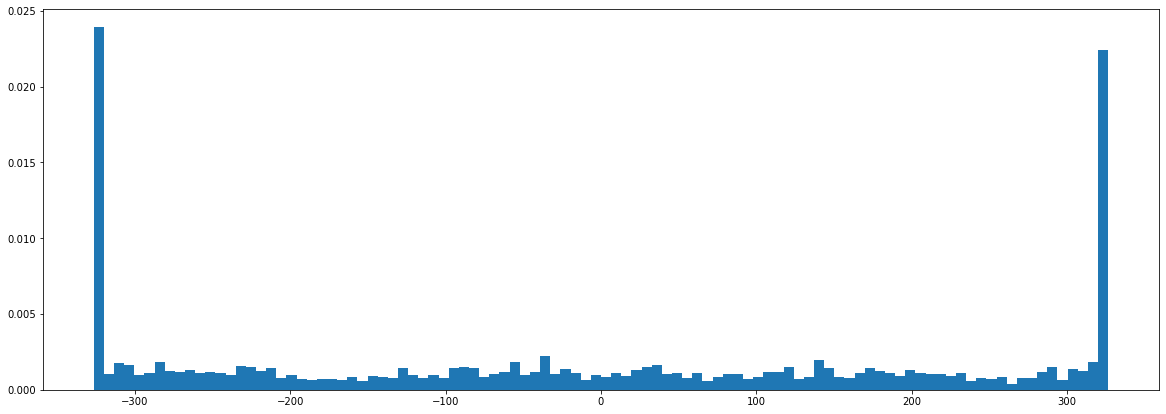

In [119]:
hist_voltage_q = plt.hist(voltage_q, density=True, bins=100)

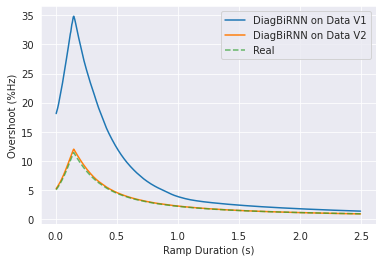

In [147]:
fin = open('../../../results/Data_23042020/ramp_vs_overshoot_bad.pkl', 'rb')
data = pickle.load(fin)
fin.close()
ramps = [x[0] for x in data]
sim_overshoots = [x[1]['overshoot_errs'][0] for x in data] 
model_overshoots = [x[1]['model_overshoot_errs'][0] for x in data] 
model_smape = [x[2]['smape'] for x in data]
model_r2 = [x[2]['r2'] for x in data]
model_mae = [x[2]['mae'] for x in data]
model_rmse = [x[2]['rmse'] for x in data]

fin = open('../../../results/Data_11052020/ramp_vs_overshoot_good.pkl', 'rb')
data = pickle.load(fin)
fin.close()
good_model_overshoots = [x[1]['model_overshoot_errs'][0] for x in data] 
good_model_smape = [x[2]['smape'] for x in data]
good_model_r2 = [x[2]['r2'] for x in data]
good_model_mae = [x[2]['mae'] for x in data]
good_model_rmse = [x[2]['rmse'] for x in data]


sns.set_style("darkgrid")
plt.plot(ramps, model_overshoots, label="DiagBiRNN on Data V1")
plt.plot(ramps, good_model_overshoots, label="DiagBiRNN on Data V2")
plt.plot(ramps, sim_overshoots, '--', label="Real", alpha=0.7)
plt.legend()
plt.xlabel('Ramp Duration (s)')
plt.ylabel('Overshoot (%Hz)')
plt.savefig('goodbad.pdf', dpi=500, bbox_inches='tight', pad_inches=0)

In [18]:
print(np.mean(model_smape), np.mean(good_model_smape))
print(np.mean(model_mae), np.mean(good_model_mae))
print(np.mean(model_r2), np.mean(good_model_r2))
print(np.mean(model_rmse), np.mean(good_model_rmse))

32.64591250690511 29.960778603527388
0.0015730349 0.0003945687
0.9991236612479244 0.9999854227988931
0.0057279724 0.0008232699


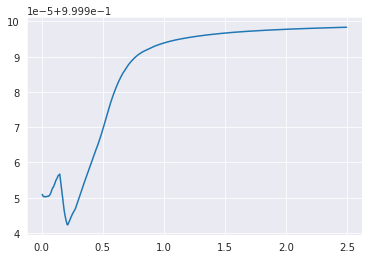

In [28]:

plt.plot(ramps, good_model_r2)

In [234]:
speed_fnn = 0
speed_cnn = 0
speed_rnn = 0
speed_vanilla = 0
speed_skip = 0
speed_rnn_skip = 0
speed_birnn_skip = 0
speed_diag_birnn_skip = 0

torque_fnn = 0
torque_cnn = 0
torque_rnn = 0
torque_vanilla = 0
torque_skip = 0
torque_rnn_skip = 0
torque_birnn_skip = 0
torque_diag_birnn_skip = 0

metric = 'r2'

for bench in ['bench1', 'bench2', 'bench3', 'bench4', 'bench5', 'bench6']:
    data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics(bench)

    speed_fnn += dfnn['speed_ml_metrics'][metric]
    torque_fnn += dfnn['torque_ml_metrics'][metric]
    
    speed_rnn += drnn['speed_ml_metrics'][metric]
    torque_rnn += drnn['torque_ml_metrics'][metric]
    
    speed_cnn += scnn['speed_ml_metrics'][metric]
    torque_cnn += scnn['torque_ml_metrics'][metric]
    
    speed_vanilla += dcnn['speed_ml_metrics'][metric]
    torque_vanilla += dcnn['torque_ml_metrics'][metric]
    
    speed_skip += skip['speed_ml_metrics'][metric]
    torque_skip += skip['torque_ml_metrics'][metric]
    
    speed_rnn_skip += rnn_skip['speed_ml_metrics'][metric]
    torque_rnn_skip += rnn_skip['torque_ml_metrics'][metric]
    
    speed_birnn_skip += birnn_skip['speed_ml_metrics'][metric]
    torque_birnn_skip += birnn_skip['torque_ml_metrics'][metric]
    
    speed_diag_birnn_skip += diag_birnn_skip['speed_ml_metrics'][metric]
    torque_diag_birnn_skip += diag_birnn_skip['torque_ml_metrics'][metric]
    
print ('speed fnn', speed_fnn / 6)
print ('speed rnn', speed_rnn / 6)
print ('speed cnn', speed_cnn / 6)
print ('speed vanilla', speed_vanilla / 6)
print ('speed skip', speed_skip / 6)
print ('speed rnn skip', speed_rnn_skip / 6)
print ('speed birnn skip', speed_birnn_skip / 6)
print ('speed diag birnn skip', speed_diag_birnn_skip / 6)

print ('########')

print ('torque fnn', torque_fnn / 6)
print ('torque rnn', torque_rnn / 6)
print ('torque cnn', torque_cnn / 6)
print ('torque vanilla', torque_vanilla / 6)
print ('torque skip', torque_skip / 6)
print ('torque rnn skip', torque_rnn_skip / 6)
print ('torque birnn skip', torque_birnn_skip / 6)
print ('torque diag birnn skip', torque_diag_birnn_skip / 6)

speed fnn 0.9984010470301191
speed rnn 0.9997824415095834
speed cnn 0.9999722367303772
speed vanilla 0.9999718389149294
speed skip 0.9998964410549437
speed rnn skip 0.9999525241201445
speed birnn skip 0.9999546557520828
speed diag birnn skip 0.9999844515161915
########
torque fnn 0.9919758328713592
torque rnn 0.9993067444238918
torque cnn 0.9992715234032553
torque vanilla 0.9991807198816912
torque skip 0.9997214327637889
torque rnn skip 0.9995195092863947
torque birnn skip 0.9996099315666522
torque diag birnn skip 0.9999585277601394


In [137]:
def print_metrics(name, model, idx):
    print ('\\textbf{' + name + '}', '&', round(model['model_speed_metrics']['perc2_times'][idx], 6), 
                 '&', round(model['model_speed_metrics']['perc95_times'][idx], 6),
                 '&', round(model['model_speed_metrics']['following_errs'][idx], 6),
                 '&', round(model['model_speed_metrics']['overshoot_errs'][idx], 6),
                 '&', round(model['model_speed_metrics']['sse_errs'][idx], 6),
                 '&', round(model['model_speed_metrics']['max_trq_accs'][idx], 6), '\\\\')
    
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics('bench3')


idx = -1
print ('\\textbf{' + 'Real}', '&', round(sfnn['speed_metrics']['perc2_times'][idx], 6), 
                 '&', round(sfnn['speed_metrics']['perc95_times'][idx], 6),
                 '&', round(sfnn['speed_metrics']['following_errs'][idx], 6),
                 '&', round(sfnn['speed_metrics']['overshoot_errs'][idx], 6),
                 '&', round(sfnn['speed_metrics']['sse_errs'][idx], 6),
                 '&', round(sfnn['speed_metrics']['max_trq_accs'][idx], 6), '\\\\')
print_metrics('FNN', dfnn, idx)
print_metrics('LSTM', drnn, idx)
print_metrics('CNN', scnn, idx)
print_metrics('Vanilla', dcnn, idx)
print_metrics('Skip', skip, idx)
print_metrics('RNN', rnn_skip, idx)
print_metrics('BiRNN', birnn_skip, idx)
print_metrics('DiagBiRNN', diag_birnn_skip, idx)

\textbf{Real} & 0.052 & 0.956 & 0.1015 & 2.0036 & -0.0944 & 172.3332 \\
\textbf{FNN} & 0.856 & 1.944 & 1.0634 & 4.0314 & 0.3802 & 169.3523 \\
\textbf{LSTM} & 0.032 & 1.052 & 0.1024 & 7.4562 & -0.3265 & 173.3043 \\
\textbf{CNN} & 0.044 & 0.96 & 0.4164 & 3.2125 & -0.0821 & 172.3022 \\
\textbf{Vanilla} & 0.044 & 0.956 & 0.3382 & 3.548 & -0.1064 & 172.2906 \\
\textbf{Skip} & 0.048 & 1.036 & 0.4481 & 5.0732 & -0.1588 & 171.2795 \\
\textbf{RNN} & 0.048 & 0.936 & 0.2573 & 3.8937 & -0.0571 & 172.2542 \\
\textbf{BiRNN} & 0.048 & 0.94 & 0.0214 & 3.2818 & -0.1276 & 172.4496 \\
\textbf{DiagBiRNN} & 0.052 & 0.948 & 0.1486 & 2.3933 & -0.1208 & 172.1503 \\


In [55]:
def print_tmetrics(name, model, idx):
    print ('\\textbf{' + name + '}', '&', round(model['model_torque_metrics']['perc2_times'][idx], 6), 
                 '&', round(model['model_torque_metrics']['perc95_times'][idx], 6),
                 '&', round(model['model_torque_metrics']['following_errs'][idx], 6),
                 '&', round(model['model_torque_metrics']['overshoot_errs'][idx], 6),
                 '&', round(model['model_torque_metrics']['sse_errs'][idx], 6),
                 '&', round(model['model_torque_metrics']['speed_drops'][idx], 6), '\\\\')
    
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics('bench4')


idx = -1
print ('\\textbf{' + 'Real}', '&', round(sfnn['torque_metrics']['perc2_times'][idx], 6), 
                 '&', round(sfnn['torque_metrics']['perc95_times'][idx], 6),
                 '&', round(sfnn['torque_metrics']['following_errs'][idx], 6),
                 '&', round(sfnn['torque_metrics']['overshoot_errs'][idx], 6),
                 '&', round(sfnn['torque_metrics']['sse_errs'][idx], 6),
                 '&', round(sfnn['torque_metrics']['speed_drops'][idx], 6), '\\\\')
print_tmetrics('FNN', dfnn, idx)
print_tmetrics('LSTM', drnn, idx)
print_tmetrics('CNN', scnn, idx)
print_tmetrics('Vanilla', dcnn, idx)
print_tmetrics('Skip', skip, idx)
print_tmetrics('RNN', rnn_skip, idx)
print_tmetrics('BiRNN', birnn_skip, idx)
print_tmetrics('DiagBiRNN', diag_birnn_skip, idx)

\textbf{Real} & 0.008 & 0.244 & 98.6784 & 15.9643 & 0.0032 & 4.3945 \\
\textbf{FNN} & 0.0 & 0.252 & 78.5265 & 11.1929 & -0.3221 & 3.2977 \\
\textbf{LSTM} & 0.008 & 0.244 & 98.6156 & 15.949 & -0.0161 & 4.2777 \\
\textbf{CNN} & 0.0 & 0.244 & 95.1635 & 16.0131 & 0.0047 & 4.4547 \\
\textbf{Vanilla} & 0.0 & 0.244 & 94.1843 & 15.4586 & 0.0441 & 3.8789 \\
\textbf{Skip} & 0.008 & 0.244 & 98.8271 & 15.9016 & -0.0199 & 4.4301 \\
\textbf{RNN} & 0.004 & 0.244 & 97.7868 & 15.8727 & -0.0023 & 4.0266 \\
\textbf{BiRNN} & 0.008 & 0.244 & 98.3256 & 16.0078 & 0.0154 & 4.2308 \\
\textbf{DiagBiRNN} & 0.008 & 0.244 & 98.4457 & 15.9072 & -0.0122 & 4.3119 \\


In [135]:
st = 7 * 250
et = 57 * 250
data, sfnn, dfnn, srnn, drnn, scnn, dcnn, skip, rnn_skip, birnn_skip, diag_birnn_skip = get_data_metrics('bench6')
print (round(max(abs(data['speed'][st:et] - dfnn['pred_speed'][st:et])), 3), '&', round(max(abs(data['speed'][st:et] - drnn['pred_speed'][st:et])), 3),'&',
       round(max(abs(data['speed'][st:et] - scnn['pred_speed'][st:et])), 3), '&', round(max(abs(data['speed'][st:et] - dcnn['pred_speed'][st:et])), 3),'&', 
       round(max(abs(data['speed'][st:et] - skip['pred_speed'][st:et])), 3), '&', round(max(abs(data['speed'][st:et] - rnn_skip['pred_speed'][st:et])), 3),'&',
       round(max(abs(data['speed'][st:et] - birnn_skip['pred_speed'][st:et])), 3), '&', round(max(abs(data['speed'][st:et] - diag_birnn_skip['pred_speed'][st:et])), 3), '\\\\')

5.751 & 0.629 & 0.259 & 0.336 & 0.444 & 0.258 & 0.346 & 0.171 \\


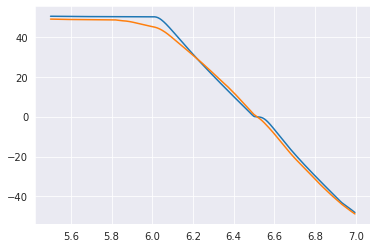

In [138]:
plt.plot(data['time'][int(5.5 * 250):7*250], data['speed'][int(5.5 * 250):7*250])
plt.plot(data['time'][int(5.5 * 250):7*250], dfnn['pred_speed'][int(5.5 * 250):7*250])

In [142]:
def mirror(reference, simulated, first_value):
    reference = abs(reference - first_value)
    simulated = abs(simulated - first_value)
    return reference, simulated

def response_time_2perc(reference, simulated, time):
    #when is the simulated quantity 2% of the nominal reference quantity
    print (time[np.argmax(simulated >= 0.02 * reference.max())])
    perc2_time = time[np.argmax(simulated >= 0.02 * reference.max())] - 6.0
    return perc2_time

In [143]:
ref, sim = mirror(data['reference_speed_interp'][int(5.5 * 250):7*250], dfnn['pred_speed'][int(5.5 * 250):7*250], data['reference_speed_interp'][int(5.5 * 250)])
response_time_2perc(ref, sim, data['time'][int(5.5 * 250):7*250])

5.856


-0.14400000000000013

In [144]:
0.144 / 0.004

36.0